In [1]:
import matplotlib.pyplot as plt
from tqdm import * #progress bar
from sccm import *
import numpy as np

In [2]:
p = Parameters()
#p['Model']['fraction_random_traders'] = 1.
#p['Model']['fraction_miners']['a'] = 0.
#p['Model']['fraction_miners']['b'] = 0.
p['Model']['scalingfactor'] =1000
#p['Model']['initial_price'] = 1000
#p['Trader']['Chartist']['strategy_pricevariance_threshold'] = 0.#1e-06
#p['Trader']['RandomTrader']['probability_market_order'] = 0.
#p['Trader']['Chartist']['probability_market_order'] = 0.

model = PaperModel(p)

In [3]:
#model.later_agents.clear()

In [4]:
#%%prun -s cumulative
for i in tqdm(range(1000)): #todo use batch runner from mesa for MC sim
    model.step()

100%|██████████| 1000/1000 [00:01<00:00, 790.21it/s]


In [5]:
#%%prun -s cumulative
for i in tqdm(range(100)): #todo use batch runner from mesa for MC sim
    model.step()

100%|██████████| 100/100 [00:00<00:00, 264.06it/s]


In [6]:
gini = model.datacollector.get_model_vars_dataframe()
def plotdata(l, lg=False):
    gini[l].plot(logy=lg)
    plt.legend(l)
    plt.show()

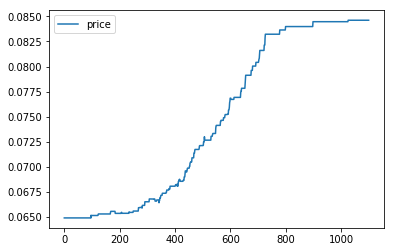

In [7]:
for p in ['price']:#, 'weighted_avg_price']:
    plotdata([p])

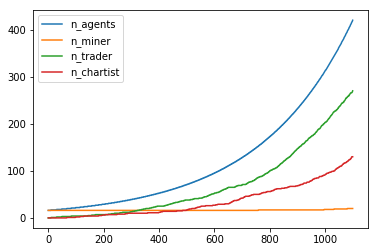

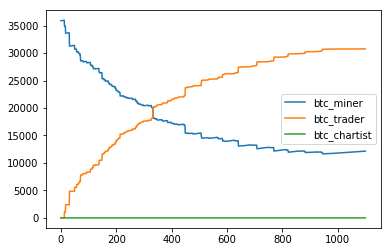

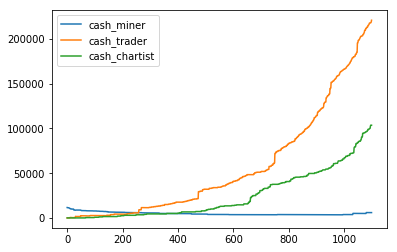

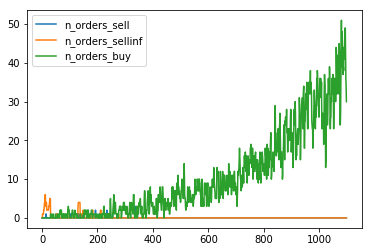

In [8]:
plotdata(['n_agents', 'n_miner', 'n_trader', 'n_chartist'])
plotdata(['btc_miner', 'btc_trader', 'btc_chartist'])
plotdata(['cash_miner', 'cash_trader', 'cash_chartist'])
plotdata(['n_orders_sell', 'n_orders_sellinf', 'n_orders_buy'])

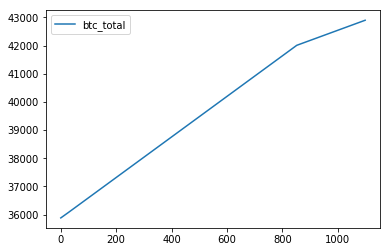

In [9]:
gini[['btc_miner', 'btc_trader', 'btc_chartist']].sum(axis=1).plot()
plt.legend(['btc_total'])
plt.show()

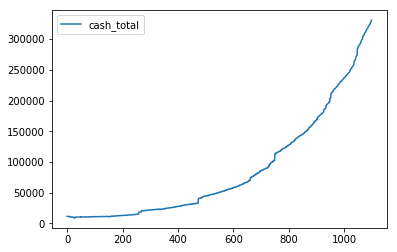

In [10]:
gini[['cash_miner', 'cash_trader', 'cash_chartist']].sum(axis=1).plot()
plt.legend(['cash_total'])
plt.show()